In [36]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
df = pd.read_csv('../input/amazon-fine-food-reviews/Reviews.csv') 

In [38]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [39]:
df['Text'].values[0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [40]:
print(df.shape)

(568454, 10)


In [41]:
#df=df.head(500)
print(df.shape)

(568454, 10)


<Axes: title={'center': 'Reviews Count'}, xlabel='Score'>

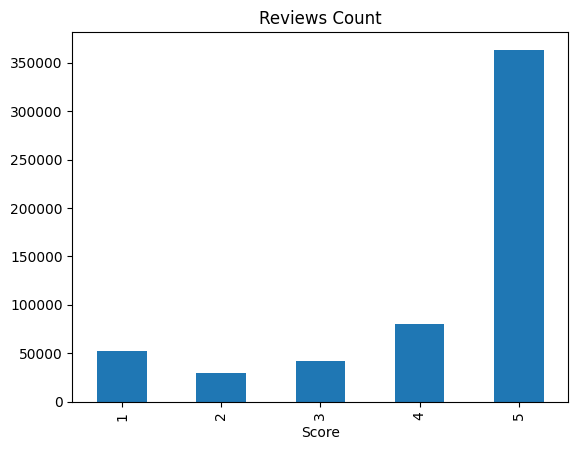

In [42]:
df['Score'].value_counts().sort_index().plot(kind='bar',title="Reviews Count")

In [43]:
example = df['Text'][22]
print(example)
tokens=nltk.word_tokenize(example)
print(tokens)

I can remember buying this candy as a kid and the quality hasn't dropped in all these years. Still a superb product you won't be disappointed with.
['I', 'can', 'remember', 'buying', 'this', 'candy', 'as', 'a', 'kid', 'and', 'the', 'quality', 'has', "n't", 'dropped', 'in', 'all', 'these', 'years', '.', 'Still', 'a', 'superb', 'product', 'you', 'wo', "n't", 'be', 'disappointed', 'with', '.']


In [44]:
pos=nltk.pos_tag(tokens) #Part Of Speech
print(pos)

[('I', 'PRP'), ('can', 'MD'), ('remember', 'VB'), ('buying', 'VBG'), ('this', 'DT'), ('candy', 'NN'), ('as', 'IN'), ('a', 'DT'), ('kid', 'NN'), ('and', 'CC'), ('the', 'DT'), ('quality', 'NN'), ('has', 'VBZ'), ("n't", 'RB'), ('dropped', 'VBN'), ('in', 'IN'), ('all', 'PDT'), ('these', 'DT'), ('years', 'NNS'), ('.', '.'), ('Still', 'RB'), ('a', 'DT'), ('superb', 'JJ'), ('product', 'NN'), ('you', 'PRP'), ('wo', 'MD'), ("n't", 'RB'), ('be', 'VB'), ('disappointed', 'VBN'), ('with', 'IN'), ('.', '.')]


In [45]:
entities=nltk.chunk.ne_chunk(pos) #makes it easier to extract meaningful insights from text.
entities.pprint()

(S
  I/PRP
  can/MD
  remember/VB
  buying/VBG
  this/DT
  candy/NN
  as/IN
  a/DT
  kid/NN
  and/CC
  the/DT
  quality/NN
  has/VBZ
  n't/RB
  dropped/VBN
  in/IN
  all/PDT
  these/DT
  years/NNS
  ./.
  Still/RB
  a/DT
  superb/JJ
  product/NN
  you/PRP
  wo/MD
  n't/RB
  be/VB
  disappointed/VBN
  with/IN
  ./.)


In [46]:
#The VADER (Valence Aware Dictionary and sEntiment Reasoner)
#model is a sentiment analysis tool specialized for social
#media and short texts. It uses a lexicon-based approach with
#pre-defined sentiment scores for words, handling negations,
#intensifiers, and emojis. 
#DOES NOT ACCOUNT FOR RELATIONSHIPS BETWEEN WORDS

In [47]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm #progression bar
sia=SentimentIntensityAnalyzer()
sia

In [48]:
print(example)
sia.polarity_scores(example)

I can remember buying this candy as a kid and the quality hasn't dropped in all these years. Still a superb product you won't be disappointed with.


{'neg': 0.0, 'neu': 0.768, 'pos': 0.232, 'compound': 0.7687}

In [49]:
#polarity score for the whole datatset
result={}
for i , col in tqdm(df.iterrows() , total=len(df)) : #total is the limit of progression bar
    text = col['Text']
    myid=col['Id']
    result[myid]=sia.polarity_scores(text)
#print(result)
    

  0%|          | 0/568454 [00:00<?, ?it/s]

In [50]:
vaders = pd.DataFrame(result).T
vaders = vaders.reset_index().rename(columns={'index' : 'Id'})
vaders = vaders.merge(df,how='left')
vaders

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.079,0.853,0.068,-0.1027,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568449,568450,0.072,0.600,0.327,0.8589,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,0.190,0.697,0.114,-0.4848,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,0.037,0.884,0.078,0.4352,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,0.041,0.506,0.452,0.9717,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


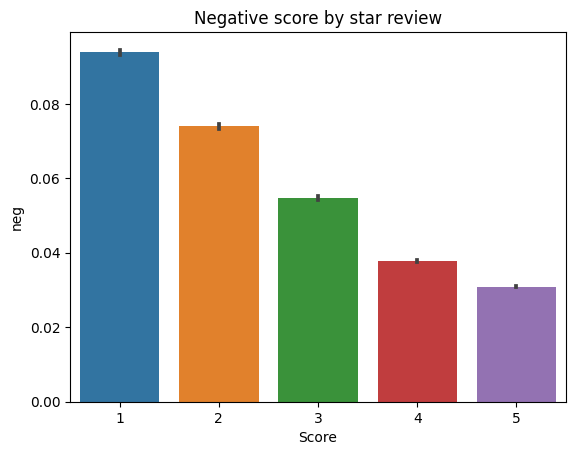

In [51]:
#results viz
ax=sns.barplot(data=vaders , x='Score' , y='neg')
ax.set_title("Negative score by star review")
plt.show()

In [52]:
#RoBERTA accounts for context and relationship between words
#Transformer based
#Pre trained model

In [53]:
from transformers import AutoTokenizer #HuggingFace library
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [54]:
#pre trained model
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [55]:
print(example)
print(" VADER results : ")
sia.polarity_scores(example)

I can remember buying this candy as a kid and the quality hasn't dropped in all these years. Still a superb product you won't be disappointed with.
 VADER results : 


{'neg': 0.0, 'neu': 0.768, 'pos': 0.232, 'compound': 0.7687}

In [56]:
#Run for RoBERTa model
encoded_text = tokenizer(example , return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    "roberta_neg" : scores[0],
    "roberta_neu" : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.00947941, 'roberta_neu': 0.056938626, 'roberta_pos': 0.93358195}


In [57]:
def polarity_scores_roberta(example) :
    encoded_text = tokenizer(example , return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        "roberta_neg" : scores[0],
        "roberta_neu" : scores[1],
        'roberta_pos' : scores[2]
        }
    return scores_dict
    

In [59]:
#trying for only 500 exemples
df=df.head(500)
roberta_result={}
for i , col in tqdm(df.iterrows() , total=len(df)) : #total is the limit of progression bar
    try :
        text = col['Text']
        myid=col['Id']
        roberta_result[myid]=polarity_scores_roberta(text)
    except RuntimeError :
        print("problem with id :",myid)
#print(roberta_result)


    

  0%|          | 0/500 [00:00<?, ?it/s]

problem with id : 83
problem with id : 187


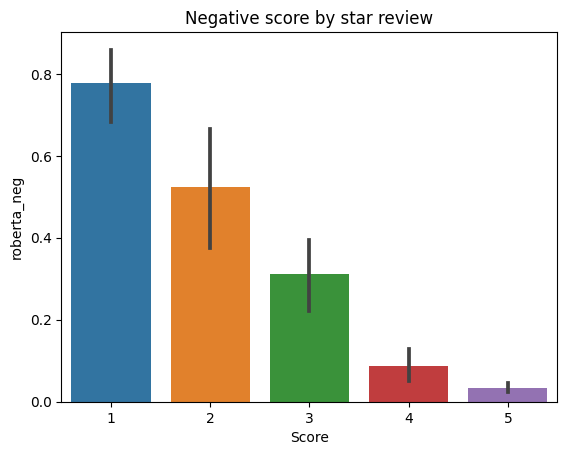

In [60]:
roberta = pd.DataFrame(roberta_result).T
roberta = roberta.reset_index().rename(columns={'index' : 'Id'})
roberta = roberta.merge(df,how='left')
vaders
#results viz
ax=sns.barplot(data=roberta , x='Score' , y='roberta_neg')
ax.set_title("Negative score by star review")
plt.show()

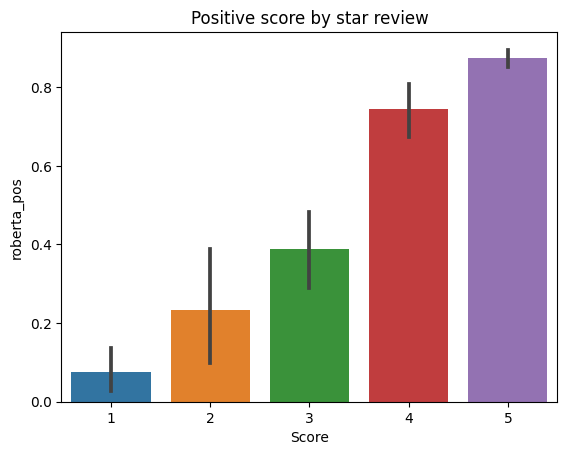

In [61]:
ax=sns.barplot(data=roberta , x='Score' , y='roberta_pos')
ax.set_title("Positive score by star review")
plt.show()